## Pheno-Ranker
<em>Advancing Semantic Similarity Analysis of Phenotypic Data Stored in GA4GH Standards and Beyond.</em>


# Installation

*Note:* We'll perform an installation directly from the [GitHub](https://github.com/CNAG-Biomedical-Informatics/pheno-ranker) source.

First we will download the repository by using `git clone`

In [ ]:
!git clone https://github.com/CNAG-Biomedical-Informatics/pheno-ranker.git


Cloning into 'pheno-ranker'...
remote: Enumerating objects: 2192, done.
remote: Counting objects: 100% (229/229), done.
remote: Compressing objects: 100% (111/111), done.
remote: Total 2192 (delta 120), reused 182 (delta 89), pack-reused 1963
Receiving objects: 100% (2192/2192), 10.76 MiB | 12.86 MiB/s, done.
Resolving deltas: 100% (1232/1232), done.


Now we enter into `pheno-ranker` directory:

In [ ]:
%cd pheno-ranker/

/content/pheno-ranker/pheno-ranker


And we perform the installation of the needed dependencies.
Note that this task will take **a few minutes** to complete...

In [ ]:
!make -f makefile.install install

sudo apt-get install cpanminus libperl-dev python3-pip libzbar0
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
cpanminus is already the newest version (1.7045-1).
libzbar0 is already the newest version (0.23.92-4build2).
libperl-dev is already the newest version (5.34.0-3ubuntu1.3).
python3-pip is already the newest version (22.0.2+dfsg-1ubuntu0.4).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
pip3 install -r requirements.txt
cpanm --notest --installdeps .	
--> Working on .
Configuring /content/pheno-ranker/pheno-ranker ... OK
<== Installed dependencies for .. Finishing.


The CLI is located at `bin/pheno-ranker`. Let's execute it to visualize the help:

In [ ]:
!bin/pheno-ranker -h

Usage:
    pheno-ranker -r <individuals.json> -t <patient.json> [-options]

         Arguments:                       
         * Cohort mode:
           -r|reference                   BFF/PXF file(s) (JSON|YAML array or object)

         * Patient mode:
           -t|target                      BFF/PXF file (JSON|YAML object or array of 1 object)

         Options:
           -age                           Include age-related variables [>no-age|age]
           -a|align                       Write alignment file(s). If no argument is given the files will be named [alignment.*]
           -append-prefixes               The prefixes to be added to the primary_key of individuals when #cohorts >= 2 [C]
           -config                        YAML config file to change default parameters [share/conf/config.yaml)
           -e|export                      Export miscellanea JSON files. If no argument is given the files will be named [export.*]
           -exclude-terms                 Exclu

# Command-line examples

Ok, we're going to run a few jobs. We'll be using the included test data.

## Cohort Mode

### Intra-Cohort analysis

Our input file is going to be the `individuals` entity from the Beacon v2 Models serialized as `JSON` in the its data exchange format (Beacon Friendly Format; BFF).

Let's take a look to its content with [JSON Hero](https://jsonhero.io/new?url=https://raw.githubusercontent.com/cnag-biomedical-informatics/pheno-ranker/main/t/individuals.json).

In [ ]:
#@title
%%html
<Iframe src="https://jsonhero.io/new?url=https://raw.githubusercontent.com/cnag-biomedical-informatics/pheno-ranker/main/t/individuals.json", width='1600', height='500'>

Nice!

We are going to start by performing an intra-cohort analysis.

From now on. we'll be storing the files in the directory `/content`.

In [ ]:
!bin/pheno-ranker -r t/individuals.json -o /content/matrix.txt

Uhmm...no output on the screen, what happened?

Well, this is actually a sign that the program worked fine. No news is good news.

A new file was created at `/content/matrix.txt`.

*Note:* You can access the directory `/content` by clicking in the folder icon on the left side navigation menu.


Let's use the Linux command `head` see the first 10 lines of the file.

In [ ]:
!head /content/matrix.txt

	107:week_0_arm_1	107:week_2_arm_1	107:week_14_arm_1	125:week_0_arm_1	125:week_2_arm_1	125:week_14_arm_1	125:week_26_arm_1	125:week_52_arm_1	125:week_78_arm_1	215:week_0_arm_1	215:week_2_arm_1	215:week_14_arm_1	215:week_26_arm_1	215:week_52_arm_1	215:week_78_arm_1	257:week_0_arm_1	257:week_2_arm_1	257:week_14_arm_1	257:week_26_arm_1	275:week_0_arm_1	275:week_2_arm_1	275:week_14_arm_1	275:week_52_arm_1	305:week_0_arm_1	305:week_26_arm_1	305:week_52_arm_1	365:week_0_arm_1	365:week_2_arm_1	365:week_14_arm_1	365:week_26_arm_1	365:week_52_arm_1	527:week_0_arm_1	527:week_2_arm_1	527:week_14_arm_1	527:week_26_arm_1	527:week_52_arm_1
107:week_0_arm_1	0	24	23	6	23	23	24	43	40	16	27	29	27	49	32	29	45	45	50	14	25	30	51	18	26	45	20	25	26	30	45	24	24	23	32	43
107:week_2_arm_1	24	0	3	22	3	3	2	23	18	30	7	9	7	29	10	47	25	25	28	30	5	10	31	32	4	25	34	5	6	8	25	42	2	3	10	23
107:week_14_arm_1	23	3	0	21	2	2	3	22	19	29	6	8	6	28	11	46	24	24	29	29	4	9	30	31	5	24	33	4	5	9	24	41	3	2	11	22
125:week_0_arm_1	6	22	2

The result is a bidimensional matrix of all the pairwise [Hamming distances](https://en.wikipedia.org/wiki/Hamming_distance) between the 36 individuals.

We'll resort to R for analysis.

First we need to do some magic to enable using R within Python:


In [ ]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


Now we install the R packages that we will be using:

In [ ]:
%%R
install.packages(c("pheatmap","ggrepel","dplyr", "stringr"))


(as ‘lib’ is unspecified)






















	‘/tmp/Rtmpne11Do/downloaded_packages’



There you go, we can now perform the clustering with the library [pheatmap](https://www.rdocumentation.org/packages/pheatmap/versions/1.0.12/topics/pheatmap).

The result is a heatmap with all the Hamming distances between individuals. Note that we measure **dissimilarity**, that's why the diagonal is blue.

`BLUE == GOOD (lower distance)`

`RED  == BAD (higuer distance)`

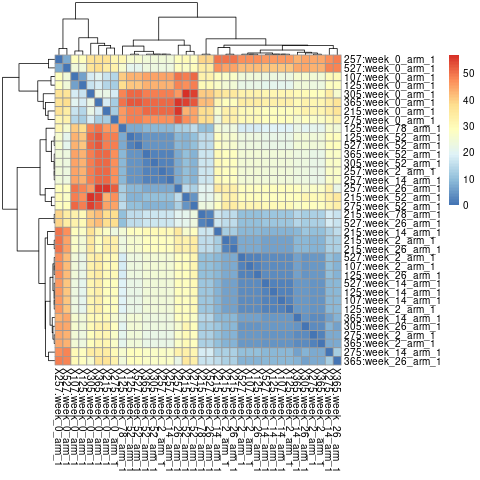

In [ ]:
# @title Plot { run: "auto" }
%%R

# Load library
library("pheatmap")

# Read in the input file as a matrix
data <- as.matrix(read.table("/content/matrix.txt", header = TRUE, row.names = 1))

# Create the heatmap with row and column labels
pheatmap(data)

We are going to perform dimensionality reduction via [MDS](https://en.wikipedia.org/wiki/Multidimensional_scaling)

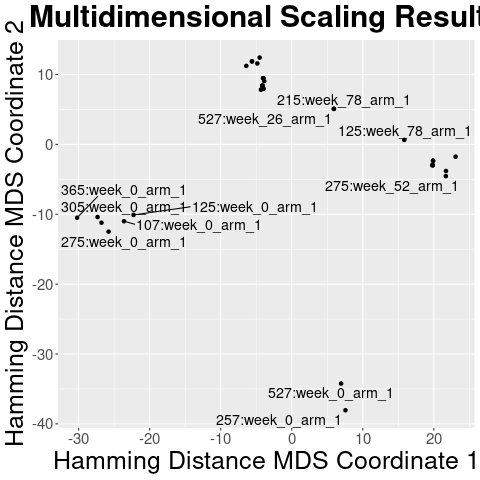

In [ ]:
# @title Plot { run: "auto" }
%%R

library(ggplot2)
library(ggrepel)

# Read in the input file as a matrix
data <- as.matrix(read.table("/content/matrix.txt", header = TRUE, row.names = 1))

#perform multidimensional scaling
fit <- cmdscale(data, eig=TRUE, k=2)

#extract (x, y) coordinates of multidimensional scaling
x <- fit$points[,1]
y <- fit$points[,2]

# Create example data frame
df <- data.frame(x, y, label=row.names(data))

# Save image
#png(filename = "mds.png", width = 1000, height = 1000,
#   units = "px", pointsize = 12, bg = "white", res = NA)

# Create scatter plot
ggplot(df, aes(x, y, label = label)) +
  geom_point() +
  geom_text_repel(size = 5, # Adjust the size of the text
                  box.padding = 0.2, # Adjust the padding around the text
                  max.overlaps = 10) + # Change the maximum number of overlaps
  labs(title = "Multidimensional Scaling Results",
       x = "Hamming Distance MDS Coordinate 1",
       y = "Hamming Distance MDS Coordinate 2") + # Add title and axis labels
  theme(
        plot.title = element_text(size = 30, face = "bold", hjust = 0.5),
        axis.title = element_text(size = 25),
        axis.text = element_text(size = 15))

#dev.off()

### Inter-Cohort Analysis

Ok, now we are goint to perform inter-cohort analysis. The mechanism is identical to that of intra-cohort, just that you can add more than one cohort after the `-r` flag. We will be using `t/individuals.json` twice for demonstration purposes.

In [ ]:
!bin/pheno-ranker -r t/individuals.json t/individuals.json -o /content/inter_cohort_default_matrix.txt

Ok, let's perform the heatmap. You will see that by default `pheno-ranker` added `C1_` and `C2_` to each cohort.

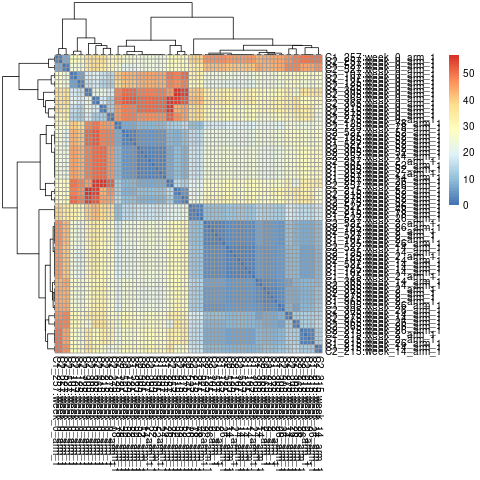

In [ ]:
# @title Plot { run: "auto" }
%%R

# Load library
library("pheatmap")

# Read in the input file as a matrix
data <- as.matrix(read.table("/content/inter_cohort_default_matrix.txt", header = TRUE, row.names = 1))

# Create the heatmap with row and column labels
pheatmap(data)

Great, it is possible to add your favourite prefix, you just have to use `--append-prefixes`, like in the example below:

In [ ]:
!bin/pheno-ranker -r t/individuals.json t/individuals.json --append-prefixes 3TR GPAP  -o /content/inter_cohort_matrix.txt

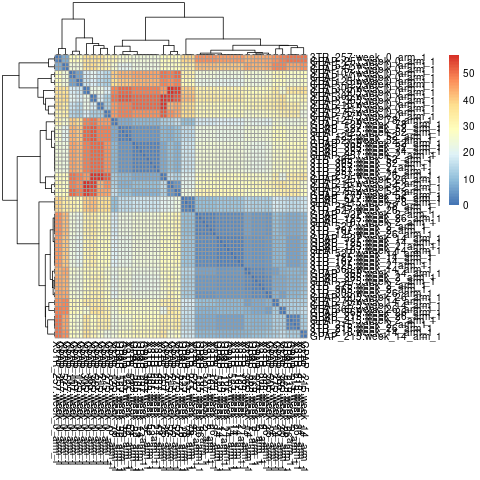

In [ ]:
# @title Plot { run: "auto" }
%%R

# Load library
library("pheatmap")

# Read in the input file as a matrix
data <- as.matrix(read.table("/content/inter_cohort_matrix.txt", header = TRUE, row.names = 1))

# Create the heatmap with row and column labels
pheatmap(data)

Great, let's perform MDS again, this time we'll add colors to the labels:

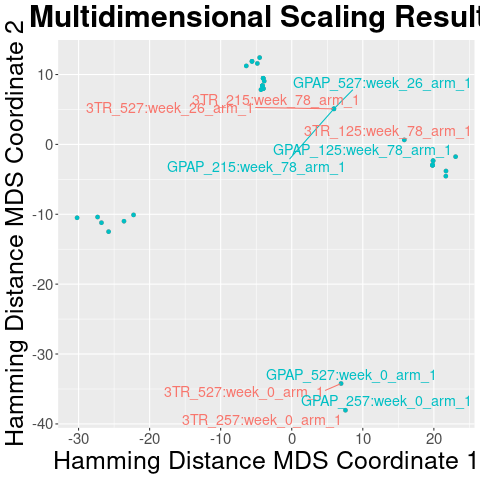

In [ ]:
# @title Plot { run: "auto" }
%%R

library(ggplot2)
library(ggrepel)
library(dplyr)
library(stringr)

# Read in the input file as a matrix
data <- as.matrix(read.table("/content/inter_cohort_matrix.txt", header = TRUE, row.names = 1))

#perform multidimensional scaling
fit <- cmdscale(data, eig=TRUE, k=2)

#extract (x, y) coordinates of multidimensional scaling
x <- fit$points[,1]
y <- fit$points[,2]

# Create example data frame
df <- data.frame(x, y, label=row.names(data))

# Add a new variable to the data frame based on the label prefixes
df <- df %>% mutate(label_prefix = str_extract(label, "^[^_]*_"))

# Save image
#png(filename = "mds.png", width = 1000, height = 1000,
#    units = "px", pointsize = 12, bg = "white", res = NA)

# Create scatter plot
ggplot(df, aes(x, y, label = label, color = label_prefix)) +
  geom_point() +
  geom_text_repel(size = 5, # Adjust the size of the text
                  box.padding = 0.2, # Adjust the padding around the text
                  max.overlaps = 10) + # Change the maximum number of overlaps
  labs(title = "Multidimensional Scaling Results",
       x = "Hamming Distance MDS Coordinate 1",
       y = "Hamming Distance MDS Coordinate 2") + # Add title and axis labels
  theme(
        plot.title = element_text(size = 30, face = "bold", hjust = 0.5),
        axis.title = element_text(size = 25),
        axis.text = element_text(size = 15),
        legend.position = "none") # remove legend

#dev.off()

## Patient Mode

Now we are going to compare a given patient to a cohort and rank the results.

In [ ]:
!bin/pheno-ranker -r t/individuals.json -t t/patient.json -max-out 10 -o /content/rank.txt

RANK	REFERENCE(ID)	TARGET(ID)	FORMAT	LENGTH	WEIGHTED	HAMMING-DISTANCE	DISTANCE-Z-SCORE	DISTANCE-P-VALUE	DISTANCE-Z-SCORE(RAND)	JACCARD-INDEX	JACCARD-Z-SCORE	JACCARD-P-VALUE
1	107:week_0_arm_1	107:week_0_arm_1	BFF	    77	False	   0	 -2.419	   0.0077787	 -8.7750	  1.000	  2.949	   0.0256500
2	125:week_0_arm_1	107:week_0_arm_1	BFF	    79	False	   6	 -1.924	   0.0271576	 -7.5381	  0.924	  2.269	   0.1022693
3	275:week_0_arm_1	107:week_0_arm_1	BFF	    86	False	  14	 -1.265	   0.1030165	 -6.2543	  0.837	  1.491	   0.3117348
4	215:week_0_arm_1	107:week_0_arm_1	BFF	    88	False	  16	 -1.100	   0.1357515	 -5.9696	  0.818	  1.321	   0.3742868
5	305:week_0_arm_1	107:week_0_arm_1	BFF	    89	False	  18	 -0.935	   0.1749800	 -5.6180	  0.798	  1.138	   0.4452980
6	365:week_0_arm_1	107:week_0_arm_1	BFF	    87	False	  20	 -0.770	   0.2207314	 -5.0389	  0.770	  0.890	   0.5437899
7	527:week_14_arm_1	107:week_0_arm_1	BFF	    78	False	  23	 -0.522	   0.3007259	 -3.6233	  0.705	  0.308	   0.7555423
8	107:w

As you have seen the output goes to the console, but it also goes to a file named `/content/rank.txt`. You can change the name of the file with the flag `-o`.

Let's load the data into Python's `pandas` and display it as HTML. Note that you can click below the table to perform miscellanea data analytics.

In [ ]:
# @title Table { run: "auto" }
import pandas as pd
from google.colab import data_table
data_table.enable_dataframe_formatter()

# Import csv
df = pd.read_csv('/content/rank.txt', delimiter='\t')
df.head(10)

,RANK,REFERENCE(ID),TARGET(ID),FORMAT,LENGTH,WEIGHTED,HAMMING-DISTANCE,DISTANCE-Z-SCORE,DISTANCE-P-VALUE,DISTANCE-Z-SCORE(RAND),JACCARD-INDEX,JACCARD-Z-SCORE,JACCARD-P-VALUE
0,1,107:week_0_arm_1,107:week_0_arm_1,BFF,77,False,0,-2.419,0.007779,-8.7750,1.000,2.949,0.025650
1,2,125:week_0_arm_1,107:week_0_arm_1,BFF,79,False,6,-1.924,0.027158,-7.5381,0.924,2.269,0.102269
2,3,275:week_0_arm_1,107:week_0_arm_1,BFF,86,False,14,-1.265,0.103016,-6.2543,0.837,1.491,0.311735
3,4,215:week_0_arm_1,107:week_0_arm_1,BFF,88,False,16,-1.100,0.135751,-5.9696,0.818,1.321,0.374287
4,5,305:week_0_arm_1,107:week_0_arm_1,BFF,89,False,18,-0.935,0.174980,-5.6180,0.798,1.138,0.445298
5,6,365:week_0_arm_1,107:week_0_arm_1,BFF,87,False,20,-0.770,0.220731,-5.0389,0.770,0.890,0.543790
6,7,527:week_14_arm_1,107:week_0_arm_1,BFF,78,False,23,-0.522,0.300726,-3.6233,0.705,0.308,0.755542
7,8,107:week_14_arm_1,107:week_0_arm_1,BFF,78,False,23,-0.522,0.300726,-3.6233,0.705,0.308,0.755542
8,9,125:week_2_arm_1,107:week_0_arm_1,BFF,78,False,23,-0.522,0.300726,-3.6233,0.705,0.308,0.755542
9,10,125:week_14_arm_1,107:week_0_arm_1,BFF,78,False,23,-0.522,0.300726,-3.6233,0.705,0.308,0.755542


We'll run again the whole thing, but this time we'll be using Python's interpreter to enable interactive changes in values.

The code will get executed **automatically** anytime you change a value and the table will be re-rendered.

In [ ]:
#@title  { run: "auto", vertical-output: true }
import os
import pandas as pd
from google.colab import data_table
data_table.enable_dataframe_formatter()

# Extarnal variables
exclude_terms = 'sex' #@param ["ethnicity", "exposures", "info", "interventionsOrProcedures", "measures", "phenotypicFeatures", "sex"] {allow-input: true}
max_out = 5 #@param {type:"slider", min:1, max:36, step:1}
sort_by = "hamming" # @param ["hamming", "jaccard"]

# Creating a dcitionary for args
arg = {
    '--exclude-terms': exclude_terms,
    '--max-out': max_out,
    '--sort-by': sort_by
}

# Create CLI string
string = ' '.join([f'{key} {value}' for key, value in arg.items()])
cmd = 'bin/pheno-ranker -r t/individuals.json -t t/patient.json -o /content/form_rank.txt ' + string
print(cmd)

# Run Convert-Pheno
os.system(cmd)

# Import csv
df = pd.read_csv('/content/form_rank.txt', delimiter='\t')
df

bin/pheno-ranker -r t/individuals.json -t t/patient.json -o /content/form_rank.txt --exclude-terms sex --max-out 5 --sort-by hamming


,RANK,REFERENCE(ID),TARGET(ID),FORMAT,LENGTH,WEIGHTED,HAMMING-DISTANCE,DISTANCE-Z-SCORE,DISTANCE-P-VALUE,DISTANCE-Z-SCORE(RAND),JACCARD-INDEX,JACCARD-Z-SCORE,JACCARD-P-VALUE
0,1,107:week_0_arm_1,107:week_0_arm_1,BFF,76,False,0,-2.389,0.008454,-8.7178,1.000,2.899,0.028780
1,2,125:week_0_arm_1,107:week_0_arm_1,BFF,78,False,6,-1.885,0.029725,-7.4730,0.923,2.212,0.112720
2,3,275:week_0_arm_1,107:week_0_arm_1,BFF,84,False,12,-1.381,0.083643,-6.5465,0.857,1.623,0.266490
3,4,215:week_0_arm_1,107:week_0_arm_1,BFF,87,False,16,-1.045,0.147997,-5.8966,0.816,1.257,0.398621
4,5,305:week_0_arm_1,107:week_0_arm_1,BFF,87,False,16,-1.045,0.147997,-5.8966,0.816,1.257,0.398621


### Extracting a patient from the cohort

To extract specific patient(s), simply use the syntax below. This will perform a _dry-run_ and retrieve the selected individuals from the cohort. of course, you can also use an external tool (e.g., `jq`) to extract `JSON` documents (or objects) from a cohort.

In [ ]:
!bin/pheno-ranker -r t/individuals.json --patients-of-interest 125:week_0_arm_1 275:week_0_arm_1 --poi-out-dir /content

# Utilities:

##  Using Pheno-Ranker with CSV files

### CASE A: With a typical CSV

You can run Pheno-Ranker using a CSV file. To do this, you must first convert the CSV to JSON using the provided utility `utils/csv2pheno_ranker/csv2pheno-ranker`.

Let's utilize the sample data included at /content/sample_data/california_housing_train.csv

**Note that this dataset is mostly quantitative data and Pheno-Ranker works better with qualitative one.**

First, we will convert the data to JSON, but we will use only 50 rows to make it more manageable.

In [ ]:
!head -51 /content/sample_data/california_housing_train.csv > /content/sample_data/california_housing_train.50.csv
!utils/csv2pheno_ranker/csv2pheno-ranker -i /content/sample_data/california_housing_train.50.csv

This created two new files:

1.  /content/sample_data/california_housing_train.50.json
2. /content/sample_data/california_housing_train_config.50.yaml

Great, but let's create a new primary key with an unique id

In [ ]:
!utils/csv2pheno_ranker/csv2pheno-ranker -i /content/sample_data/california_housing_train.50.csv --generate-primary-key --primary-key-name id --verbose

Start reading </content/sample_data/california_housing_train.50.csv>
Reading </content/sample_data/california_housing_train.50.csv> completed!
Writting </content/sample_data/california_housing_train.50.json> 
Writting </content/sample_data/california_housing_train.50_config.yaml> 


OK, let's run Pheno-Ranker in cohort mode including some variables:

In [ ]:
!bin/pheno-ranker -r /content/sample_data/california_housing_train.50.json \
                  --config /content/sample_data/california_housing_train.50_config.yaml \
                  --include-terms id housing_median_age median_house_value \
                  -o /content/california_housing_train_matrix.txt

Let's perform a clustering of that:

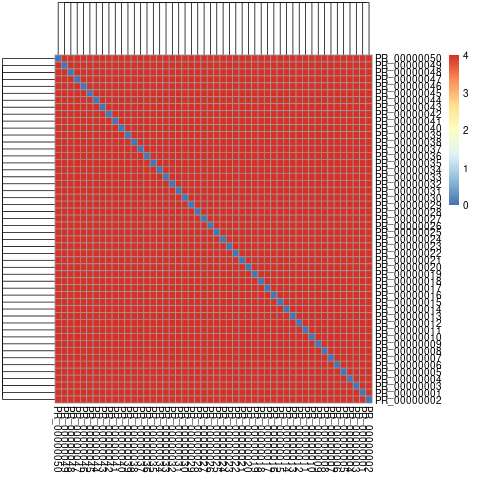

In [ ]:
# @title Plot { run: "auto" }
%%R

# Load library
library("pheatmap")

# Read in the input file as a matrix
data <- as.matrix(read.table("/content/california_housing_train_matrix.txt", header = TRUE, row.names = 1))

# Create the heatmap with row and column labels
pheatmap(data)

### CASE B: With VCF data

Note that the follwing example can be found on the [documentation](https://cnag-biomedical-informatics.github.io/pheno-ranker/vcf/).

First we will download the file from [here](https://github.com/mrueda/beacon2-ri-tools/tree/main/test):


In [ ]:
!wget https://github.com/mrueda/beacon2-ri-tools/raw/main/test/test_1000G.vcf.gz -P /content/

--2024-03-15 09:26:06--  https://github.com/mrueda/beacon2-ri-tools/raw/main/test/test_1000G.vcf.gz
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mrueda/beacon2-ri-tools/main/test/test_1000G.vcf.gz [following]
--2024-03-15 09:26:06--  https://raw.githubusercontent.com/mrueda/beacon2-ri-tools/main/test/test_1000G.vcf.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 165501 (162K) [application/octet-stream]
Saving to: ‘/content/test_1000G.vcf.gz’

test_1000G.vcf.gz   100%[===================>] 161.62K  --.-KB/s    in 0.08s   

2024-03-15 09:26:07 (1.94 MB/s) - ‘/content/test_1000G.vcf.gz’ sav

Now we will tranpose the VCF to a format suitable for `Pheno-Ranker`'s utilities:

In [ ]:
!utils/csv2pheno_ranker/vcf/vcf2pheno-ranker.py -i /content/test_1000G.vcf.gz -o /content/output.tsv

We'll now use `csv2pheno-ranker` utility:

In [ ]:
!utils/csv2pheno_ranker/csv2pheno-ranker -i /content/output.tsv -primary-key-name 'Sample ID'

This created the needed input files to run `Pheno-Ranker`. Now we will run in *cohort mode*.

Note that this may take a while as the file `vcf_matrix.txt` will consist of 2504 x 2504 pairwise-comparisons.

In [ ]:
!bin/pheno-ranker -r /content/output.json -config /content/output_config.yaml -o /content/vcf_matrix.txt

Let's visualize the first 10 columns and rows:

In [ ]:
!head -11 /content/vcf_matrix.txt | cut -f1-11

	HG00096	HG00097	HG00099	HG00100	HG00101	HG00102	HG00103	HG00105	HG00106	HG00107
HG00096	0	48	84	46	68	52	30	38	54	40
HG00097	48	0	74	50	70	46	46	46	50	50
HG00099	84	74	0	82	92	80	76	88	68	78
HG00100	46	50	82	0	72	48	54	60	46	56
HG00101	68	70	92	72	0	82	78	78	64	76
HG00102	52	46	80	48	82	0	40	60	54	60
HG00103	30	46	76	54	78	40	0	44	54	48
HG00105	38	46	88	60	78	60	44	0	60	50
HG00106	54	50	68	46	64	54	54	60	0	60
HG00107	40	50	78	56	76	60	48	50	60	0


Ok, let's use `R` to perform some clustering.

NOTE: We assume that you did the *Cohort Mode* tutorial and installed `R` packages while doing it.

Now, the analysis of 2504 x 2504 matrix will take a while in `R` so we are goint to create a subset of 100 individuals.

In [ ]:
!head -101 /content/vcf_matrix.txt | cut -f1-101 > /content/vcf_matrix.100.txt

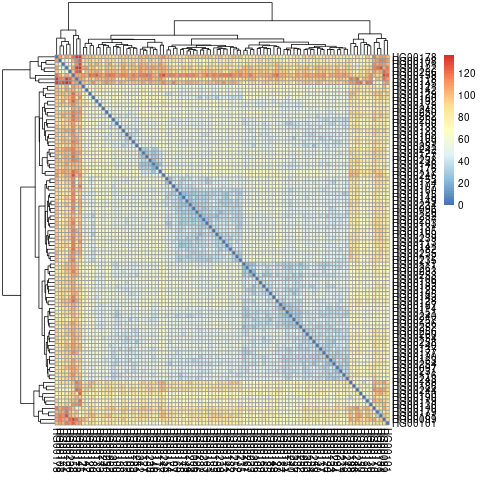

In [ ]:
# @title Plot { run: "auto" }
%%R

# Load library
library("pheatmap")

# Read in the input file as a matrix
data <- as.matrix(read.table("/content/vcf_matrix.100.txt", header = TRUE, row.names = 1))

# Create the heatmap with row and column labels
pheatmap(data)

What do you think? Nice, uhh! 😀

## Making summary statistics plots of BFF/PXF data

`Pheno-Ranker` includes an utility to create summary statistics for `BFF`and `PXF` files. The `PNG` plots created contain basic information on the terms present on each data model.

To syntax is simple:

In [ ]:
!utils/bff_pxf_plot/bff-pxf-plot -i t/individuals.json -o /content/bff-plot.png # For BFF

Let's visualize the `png`:

In [ ]:
# @title View image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Replace 'your_image.png' with the path to your PNG image
image_path = '/content/bff-plot.png'
img = mpimg.imread(image_path)

plt.figure(figsize=(28, 22))  # You can adjust the size as needed
plt.imshow(img)
plt.axis('off') # Optional: this line removes the axis around the image
plt.show()


## Creating simulated BFF/PXF data

We include a CLI utility to create simulated data. Let's start by running it without the arguments:

`--n` Number of individuals

`--o` The output file

In [ ]:
!utils/bff_pxf_simulator/bff-pxf-simulator -n 10 -o /content/individuals_random.10.json

Great! Nothing on the screen. That's good news. The script has created a file with 10 individuals using the default values, that is, using all 100 pre-configured ontologies for _diseases_, _exposures_, _phenotypicFeatures_, _procedures_ and _treatments_. The terms _sex_ and __ethincity_ are also randomly assigned.

Ok, let's do a few more examples before we got into visualization. This time we will creating 10 individuals in Phenopacket v2 data exchange format.

In [ ]:
!utils/bff_pxf_simulator/bff-pxf-simulator -n 10 -f pxf -o /content/pxf_random.10.json

Fine. Let's get more serious. From now on we'll be creating BFF, but the same philosophy applies to PXF (just add `--f pxf`).

This time we are going to create 100 individuals, with 2 diseases from a pool of 5 diseases.

In [ ]:
!utils/bff_pxf_simulator/bff-pxf-simulator -n 100 \
                                     --diseases 2 \
                                     --max-diseases-pool 5 \
                                     --exposures 0 \
                                     --phenotypicFeatures 0 \
                                     --procedures 0 \
                                     --treatments 0 \
                                     -o /content/individuals_random.100.json

OK, let's visualize the data with `bff-pxf-plot`:

In [ ]:
!utils/bff_pxf_plot/bff-pxf-plot -i /content/individuals_random.100.json -o /content/bff-plot.png # For BFF

/content/pheno-ranker/utils/bff_pxf_plot/bff_pxf_plot_utils.py:90: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pie_series = pd.Series(pie_data[key]).value_counts()
/content/pheno-ranker/utils/bff_pxf_plot/bff_pxf_plot_utils.py:90: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pie_series = pd.Series(pie_data[key]).value_counts()


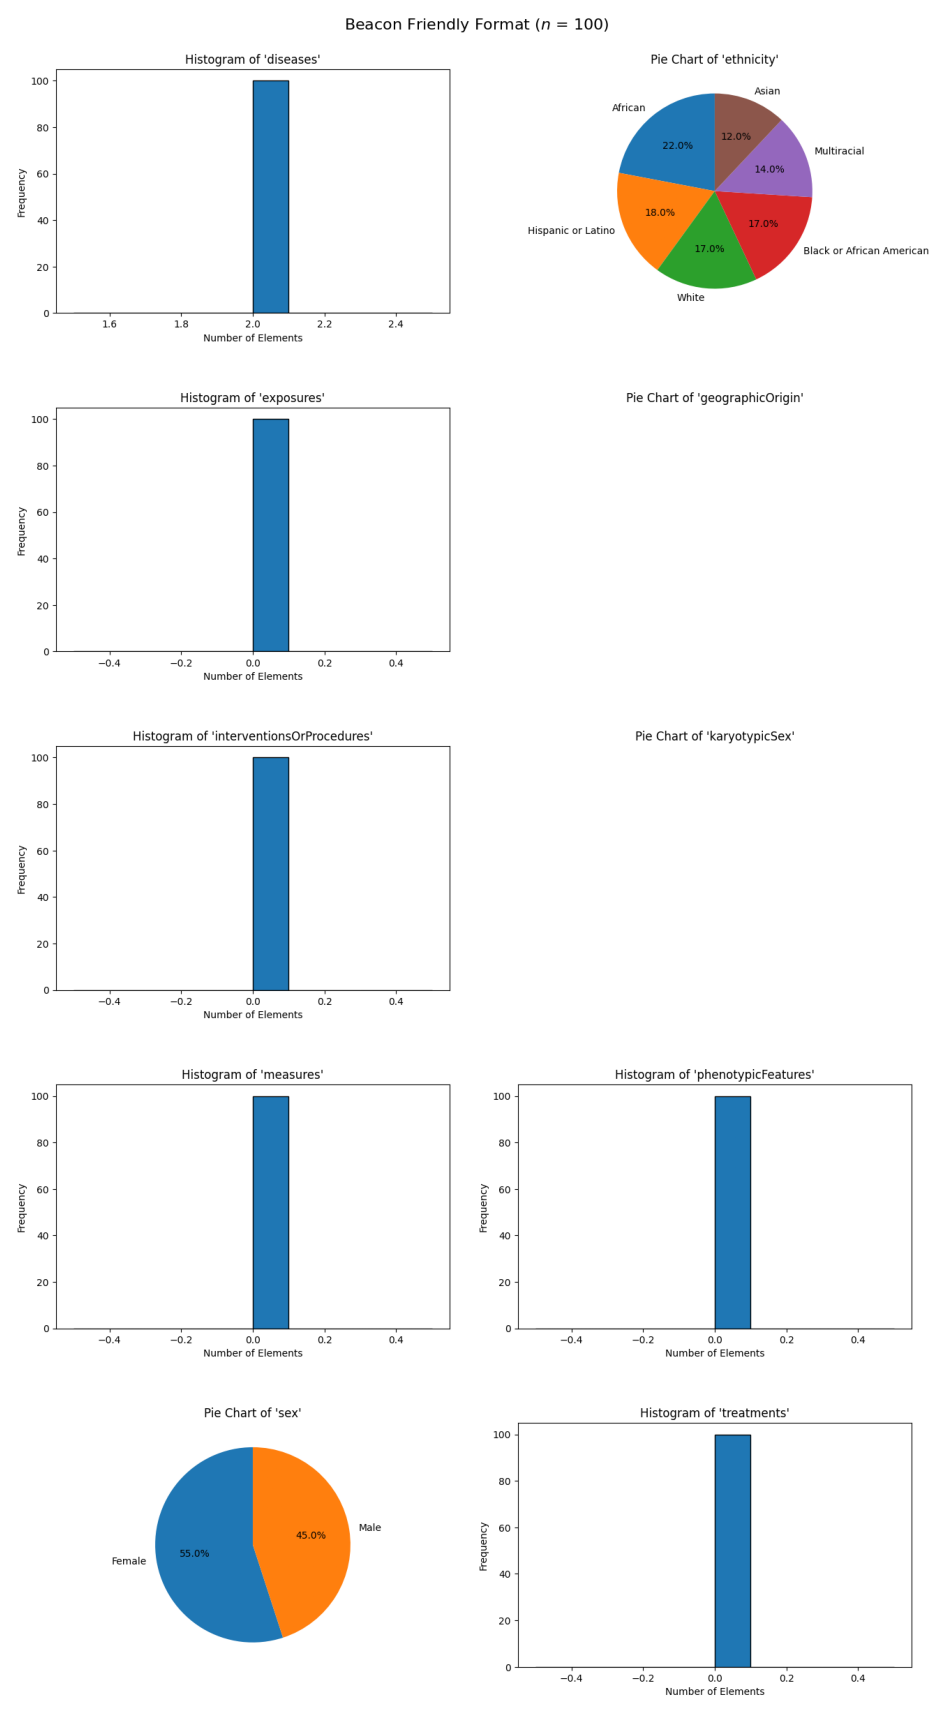

In [ ]:
# @title View image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Replace 'your_image.png' with the path to your PNG image
image_path = '/content/bff-plot.png'
img = mpimg.imread(image_path)

plt.figure(figsize=(28, 22))  # You can adjust the size as needed
plt.imshow(img)
plt.axis('off') # Optional: this line removes the axis around the image
plt.show()


Ok, you get the point. Now we are going to use Google Colab features to interactively create simulated data and display sumamry statistics as `PNG`:

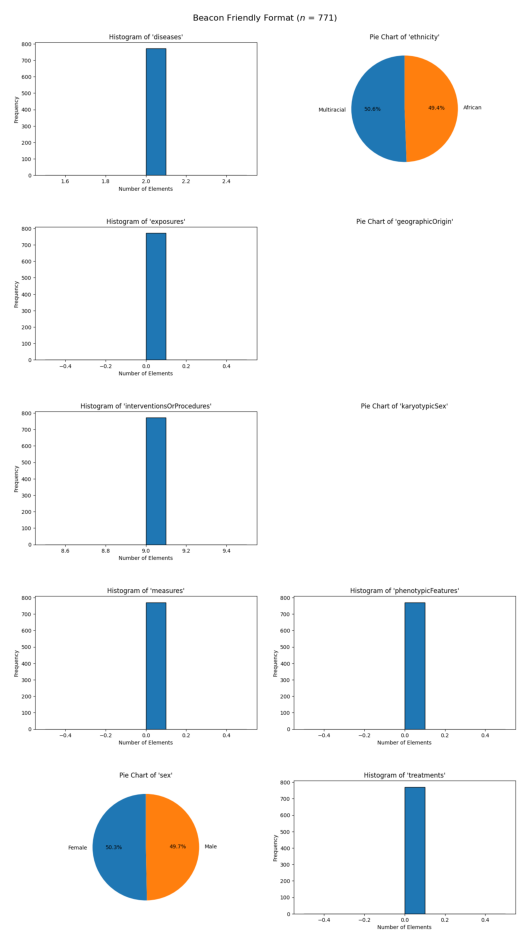

In [ ]:
#@title  { run: "auto", vertical-output: true }
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# External variables
n = 771  #@param {type:"slider", min:1, max:1001, step:10}
diseases = 2 #@param {type:"slider", min:0, max:100, step:1}
max_diseases_pool = 5 #@param {type:"slider", min:0, max:100, step:1}
exposures = 0 #@param {type:"slider", min:0, max:100, step:1}
max_exposures_pool = 0 #@param {type:"slider", min:0, max:100, step:1}
phenotypicFeatures = 0 #@param {type:"slider", min:0, max:100, step:1}
max_phenotypicFeatures_pool = 0 #@param {type:"slider", min:0, max:100, step:1}
procedures = 9 #@param {type:"slider", min:0, max:100, step:1}
max_procedures_pool = 22 #@param {type:"slider", min:0, max:100, step:1}
treatments = 0 #@param {type:"slider", min:0, max:100, step:1}
max_treatments_pool = 0 #@param {type:"slider", min:0, max:100, step:1}
max_ethnicity_pool = 2 #@param {type:"slider", min:0, max:8, step:1}

# Creating a dictionary for args
arg = {
    '--n': n,
    '--diseases': diseases,
    '--max-diseases-pool': max_diseases_pool,
    '--exposures': exposures,
    '--max-exposures-pool': max_exposures_pool,
    '--phenotypicFeatures': phenotypicFeatures,
    '--max-phenotypicFeatures-pool': max_phenotypicFeatures_pool,
    '--procedures': procedures,
    '--max-procedures-pool': max_procedures_pool,
    '--treatments': treatments,
    '--max-treatments-pool': max_treatments_pool,
    '--max-ethnicity-pool': max_ethnicity_pool
}

# Create CLI string
string = ' '.join([f'{key} {value}' for key, value in arg.items()])
cmd_sim = 'utils/bff_pxf_simulator/bff-pxf-simulator -o /content/individuals_random_form.json ' + string

# Run BFF-PXF-SIMULATOR
os.system(cmd_sim)

# Create CLI string
cmd_plot = 'utils/bff_pxf_plot/bff-pxf-plot -i /content/individuals_random_form.json -o /content/bff-plot.png'

# Run BFF-PXF-PLOT
os.system(cmd_plot)

# Replace 'your_image.png' with the path to your PNG image
image_path = '/content/bff-plot.png'
img = mpimg.imread(image_path)

plt.figure(figsize=(20, 12))  # You can adjust the size as needed
plt.imshow(img)
plt.axis('off') # Optional: this line removes the axis around the image
plt.show()

## From data to QR codes

`Pheno-Ranker` includes a set of utilities for interconverting data to QR codes and viceversa.

First, we are going to convert the data at `t/individuals.json` to QR codes. For doing so we will need to export data when running `Pheno-Ranker`.

In [ ]:
!bin/pheno-ranker -r t/individuals.json --e /content/google_colab_export

Now that we have the data exported, we can convert `t/individuals.json` to QR code.

First we will create a directory to keeo things tidy:

In [ ]:
!mkdir /content/qr_codes/

In [ ]:
!utils/barcode/pheno-ranker2barcode -i /content/google_colab_export.ref_binary_hash.json -o /content/qr_codes --no-compress


QR codes generated successfully in /content/qr_codes


Let's visualize the codes:

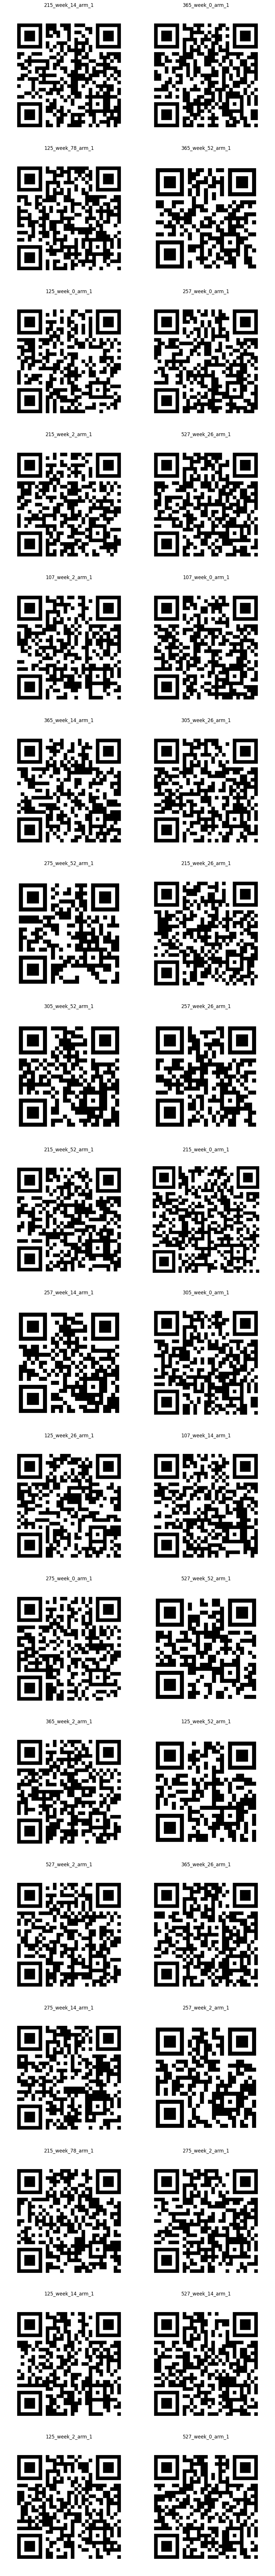

In [ ]:
# @title View QR codes
import matplotlib.pyplot as plt
import os
from PIL import Image

# Directory containing the images
image_dir = '/content/qr_codes/'

# Get a list of PNG files in the directory
image_files = [f for f in os.listdir(image_dir) if f.endswith('.png')]

# Calculate the number of rows needed (2 images per row)
n_rows = len(image_files) // 2 + (len(image_files) % 2 > 0)

# Create a figure to display the images in a 2 x n matrix
plt.figure(figsize=(10, n_rows * 5))  # Adjust the figure size as necessary

for i, image_file in enumerate(image_files):
    # Load the image
    img = Image.open(os.path.join(image_dir, image_file))

    # Split the filename and extension
    file_name_without_extension, _ = os.path.splitext(image_file)

    # Add a subplot for each image
    plt.subplot(n_rows, 2, i+1)
    plt.imshow(img)
    plt.axis('off')  # Hide axes
    plt.title(file_name_without_extension)  # Use filename without extension as title

# Adjust layout and display the figure
plt.tight_layout()
plt.show()


Great, this time the codes were uncompressed. If you would like to get them compressed simply delete the `--no-compress` option above.

## From QR codes to data

Now we are going to do the opposite, we will convert QR codes to pheno-clinical data.

In [ ]:
!utils/barcode/barcode2pheno-ranker -i /content/qr_codes/*png -t /content/google_colab_export.glob_hash.json -o /content/individuals.qr.json

Decoded data saved to /content/individuals.qr.json


## From data to PDF report

The last example is a _proof-of-concept_ of what can be done with the binary vector. We will create a PDF report from the phenotypic data created in the previous step

We'll create a directory to store the pdf

In [ ]:
!mkdir /content/pdf

mkdir: cannot create directory ‘/content/pdf’: File exists


Now we run the job:

In [ ]:
!utils/barcode/pheno-ranker2pdf -j /content/individuals.qr.json -q /content/qr_codes/*png -t bff --logo docs/img/PR-logo.png -o /content/pdf/

We have created one pdf for each individual in the file.

To visualize the pdf here, we need to install a Python library:

In [ ]:
!apt install -y poppler-utils
!pip3 install pdf2image

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 186 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.3 [186 kB]
Fetched 186 kB in 1s (271 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 125384 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.3_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.3) ...
Setting up poppler-utils (22.02.0-2ubuntu0.3) ...
Processing triggers for man-db (2.10.2-1) ...


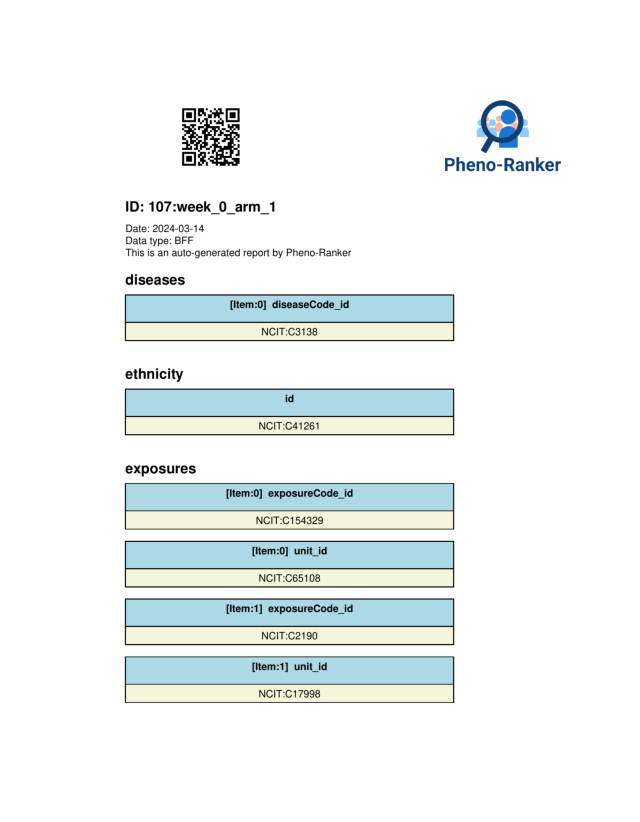

In [ ]:
# @title View PDF
from pdf2image import convert_from_path
import matplotlib.pyplot as plt

# Path to your PDF file
pdf_file = '/content/pdf/107_week_0_arm_1.pdf'

# Convert PDF to a list of images
images = convert_from_path(pdf_file)

# Display the first page
plt.figure(figsize=(8, 11))  # Adjust the size as needed
plt.imshow(images[0])
plt.axis('off')  # Hide the axes
plt.show()



Great! I hope this quick tour was useful.

Now it's time to try it out yourself!

Bye!!

Manu

# Addendum: Uploading files

It's possible to run jobs using your own files. A few notes:

* The files will be stored in **your instance** of this document. We (developers) don't have access to them.

* Uploaded files will get **deleted** when this runtime is recycled.

* `Pheno-Ranker` does not send remote information to our servers and does not store user's information.

* The security is dictated by your Google account / drive.

The files can be uploaded by clicking in the upload button on the left tab of this screen. Files will be uploaded to `/content`.

Once the file is uploaded, you can execute `pheno-ranker` command-line as we did above.